In [1]:
from utils import *
from training import training
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from tqdm import tqdm
import torchvision.models as models

In [2]:
resnet = models.resnet50(pretrained=True)

c:\Users\skinz\anaconda3\envs\Deep_learning_course\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\skinz\anaconda3\envs\Deep_learning_course\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [3]:
train_data, test_data = get_data()
train_unlabeled_loader, train_labeled_loader, test_loader = get_loader(train_data, test_data, batch_size=50)

In [4]:
for name, param in resnet.named_parameters():
    param.requires_grad = False

In [5]:
last_layer = nn.Sequential(
    nn.Linear(in_features=2048, out_features=512),
    nn.Linear(in_features=512, out_features=10)
)

resnet.fc = last_layer

In [6]:
for name, param in resnet.named_parameters():print(name, param.requires_grad)

conv1.weight False
bn1.weight False
bn1.bias False
layer1.0.conv1.weight False
layer1.0.bn1.weight False
layer1.0.bn1.bias False
layer1.0.conv2.weight False
layer1.0.bn2.weight False
layer1.0.bn2.bias False
layer1.0.conv3.weight False
layer1.0.bn3.weight False
layer1.0.bn3.bias False
layer1.0.downsample.0.weight False
layer1.0.downsample.1.weight False
layer1.0.downsample.1.bias False
layer1.1.conv1.weight False
layer1.1.bn1.weight False
layer1.1.bn1.bias False
layer1.1.conv2.weight False
layer1.1.bn2.weight False
layer1.1.bn2.bias False
layer1.1.conv3.weight False
layer1.1.bn3.weight False
layer1.1.bn3.bias False
layer1.2.conv1.weight False
layer1.2.bn1.weight False
layer1.2.bn1.bias False
layer1.2.conv2.weight False
layer1.2.bn2.weight False
layer1.2.bn2.bias False
layer1.2.conv3.weight False
layer1.2.bn3.weight False
layer1.2.bn3.bias False
layer2.0.conv1.weight False
layer2.0.bn1.weight False
layer2.0.bn1.bias False
layer2.0.conv2.weight False
layer2.0.bn2.weight False
layer2.0.bn2

In [7]:
import torch.optim as optim


output_fn = torch.nn.Softmax(dim=1)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(resnet.parameters(), lr=0.1)

In [8]:
epochs = 25
train_class = training(train_loader=train_labeled_loader, val_loader=test_loader)
train_class.train(model=resnet, epochs=epochs, optimizer=optimizer, criterion=criterion, output_fn=output_fn, RGB = True, patience_LR = 5, patience_earlystop = 50)

 <function is_available at 0x000002A5EF5A4EE0> and can be used by 1 devices
The device used is NVIDIA GeForce GTX 1050


  4%|▍         | 1/25 [00:25<10:19, 25.81s/it]

| Epoch: 1/25 | Train: Loss 1130.0010 Accuracy : 0.1000 | Val: Loss 1144.6205 Accuracy : 0.0958



  8%|▊         | 2/25 [00:40<07:18, 19.07s/it]

| Epoch: 2/25 | Train: Loss 1772.0021 Accuracy : 0.1000 | Val: Loss 1753.8425 Accuracy : 0.0985



 12%|█▏        | 3/25 [00:57<06:40, 18.22s/it]

| Epoch: 3/25 | Train: Loss 1832.1921 Accuracy : 0.1000 | Val: Loss 1909.1838 Accuracy : 0.1010



 16%|█▌        | 4/25 [01:13<06:03, 17.30s/it]

| Epoch: 4/25 | Train: Loss 1351.8323 Accuracy : 0.1000 | Val: Loss 1366.7463 Accuracy : 0.0998



 20%|██        | 5/25 [01:28<05:32, 16.64s/it]

| Epoch: 5/25 | Train: Loss 1498.6624 Accuracy : 0.1800 | Val: Loss 1500.3608 Accuracy : 0.1614



 24%|██▍       | 6/25 [01:43<05:04, 16.02s/it]

| Epoch: 6/25 | Train: Loss 1879.8564 Accuracy : 0.1900 | Val: Loss 1980.9051 Accuracy : 0.1674



 28%|██▊       | 7/25 [02:04<05:17, 17.61s/it]

| Epoch: 7/25 | Train: Loss 1879.9402 Accuracy : 0.1100 | Val: Loss 2085.0850 Accuracy : 0.1012



 32%|███▏      | 8/25 [02:25<05:18, 18.72s/it]

| Epoch: 8/25 | Train: Loss 1574.7821 Accuracy : 0.1100 | Val: Loss 1835.7132 Accuracy : 0.1021



 36%|███▌      | 9/25 [02:38<04:32, 17.02s/it]

| Epoch: 9/25 | Train: Loss 1095.4874 Accuracy : 0.1800 | Val: Loss 1280.7522 Accuracy : 0.1146



 40%|████      | 10/25 [02:53<04:02, 16.19s/it]

| Epoch: 10/25 | Train: Loss 1160.1221 Accuracy : 0.1600 | Val: Loss 1376.4063 Accuracy : 0.1269



 44%|████▍     | 11/25 [03:06<03:34, 15.33s/it]

| Epoch: 11/25 | Train: Loss 1081.7927 Accuracy : 0.2000 | Val: Loss 1294.7735 Accuracy : 0.1408



 48%|████▊     | 12/25 [03:19<03:09, 14.56s/it]

| Epoch: 12/25 | Train: Loss 1199.9448 Accuracy : 0.3300 | Val: Loss 1392.9811 Accuracy : 0.2031



 52%|█████▏    | 13/25 [03:32<02:49, 14.10s/it]

| Epoch: 13/25 | Train: Loss 1288.2405 Accuracy : 0.3200 | Val: Loss 1494.3609 Accuracy : 0.2069



 56%|█████▌    | 14/25 [03:45<02:30, 13.72s/it]

| Epoch: 14/25 | Train: Loss 1316.1088 Accuracy : 0.3300 | Val: Loss 1526.3266 Accuracy : 0.2072



 60%|██████    | 15/25 [03:59<02:17, 13.75s/it]

| Epoch: 15/25 | Train: Loss 1293.0074 Accuracy : 0.3100 | Val: Loss 1472.4663 Accuracy : 0.2159



 64%|██████▍   | 16/25 [04:12<02:04, 13.80s/it]

| Epoch: 16/25 | Train: Loss 1186.4318 Accuracy : 0.3300 | Val: Loss 1348.6055 Accuracy : 0.2262



 68%|██████▊   | 17/25 [04:26<01:49, 13.64s/it]

| Epoch: 17/25 | Train: Loss 1087.7040 Accuracy : 0.2800 | Val: Loss 1215.1176 Accuracy : 0.2344



 72%|███████▏  | 18/25 [04:39<01:34, 13.43s/it]

| Epoch: 18/25 | Train: Loss 961.6707 Accuracy : 0.3000 | Val: Loss 1127.4571 Accuracy : 0.2385



 76%|███████▌  | 19/25 [04:52<01:19, 13.30s/it]

| Epoch: 19/25 | Train: Loss 952.7702 Accuracy : 0.3500 | Val: Loss 1102.0724 Accuracy : 0.2376



 80%|████████  | 20/25 [05:05<01:06, 13.20s/it]

| Epoch: 20/25 | Train: Loss 985.4248 Accuracy : 0.3400 | Val: Loss 1122.1482 Accuracy : 0.2363



 84%|████████▍ | 21/25 [05:17<00:52, 13.10s/it]

| Epoch: 21/25 | Train: Loss 975.3367 Accuracy : 0.3800 | Val: Loss 1164.2405 Accuracy : 0.2337



 88%|████████▊ | 22/25 [05:31<00:39, 13.31s/it]

| Epoch: 22/25 | Train: Loss 953.5037 Accuracy : 0.3500 | Val: Loss 1214.7636 Accuracy : 0.2385



 92%|█████████▏| 23/25 [05:44<00:26, 13.25s/it]

| Epoch: 23/25 | Train: Loss 952.4119 Accuracy : 0.3100 | Val: Loss 1267.8539 Accuracy : 0.2371



 96%|█████████▌| 24/25 [06:00<00:14, 14.01s/it]

| Epoch: 24/25 | Train: Loss 949.2620 Accuracy : 0.3600 | Val: Loss 1317.4710 Accuracy : 0.2352



100%|██████████| 25/25 [06:14<00:00, 15.00s/it]

| Epoch: 25/25 | Train: Loss 940.2059 Accuracy : 0.3800 | Val: Loss 1352.2262 Accuracy : 0.2380



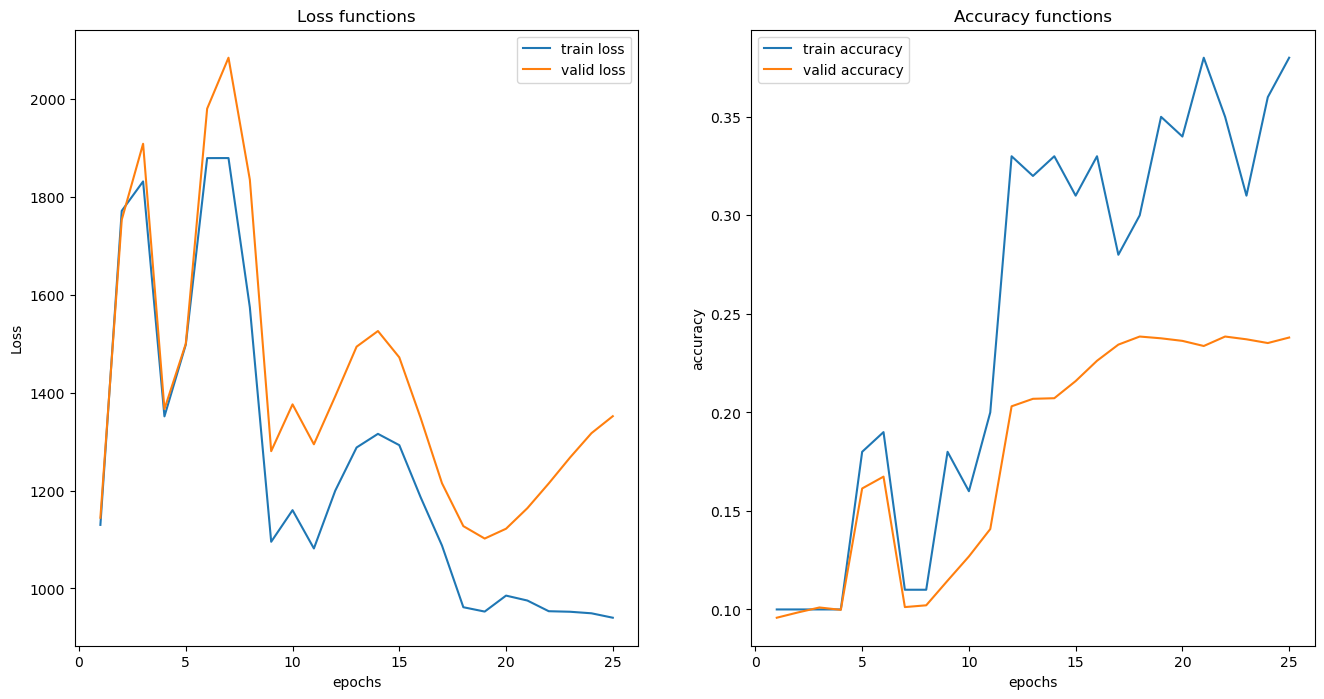

In [9]:
plt.figure(figsize=(16,8))

plt.subplot(1,2,1)
plt.plot(range(1,epochs + 1), train_class.loss_train, label="train loss" )
plt.plot(range(1, epochs +1), train_class.loss_valid, label="valid loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss functions")
plt.legend()

plt.subplot(1,2,2)
plt.plot(range(1,epochs + 1), train_class.acc_train, label="train accuracy" )
plt.plot(range(1, epochs +1), train_class.acc_valid, label="valid accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy functions")
plt.legend()

#plt.savefig("Metrics functins Resnet.png")
plt.show()

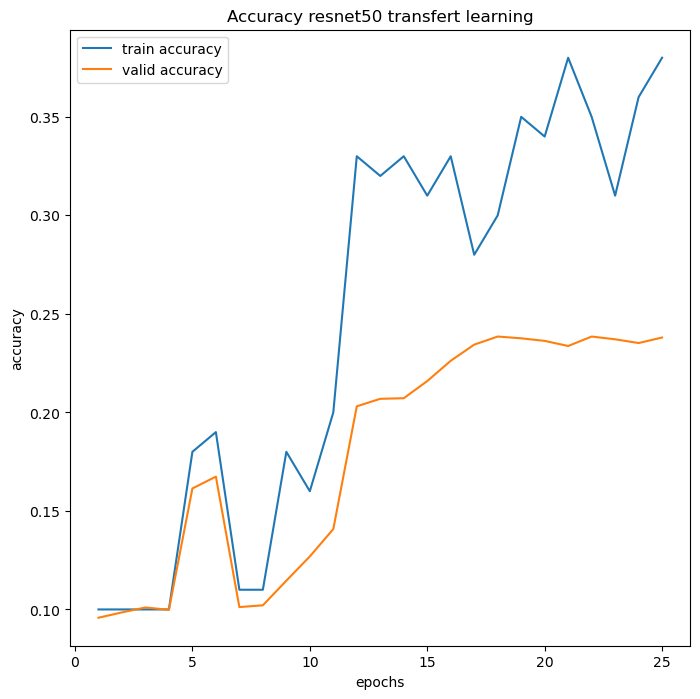

In [11]:
plt.figure(figsize=(8,8))
plt.plot(range(1,epochs + 1), train_class.acc_train, label="train accuracy" )
plt.plot(range(1, epochs +1), train_class.acc_valid, label="valid accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Accuracy resnet50 transfert learning")
plt.legend()

plt.savefig("Accuracy resnet50 transfert learning.png")
plt.show()

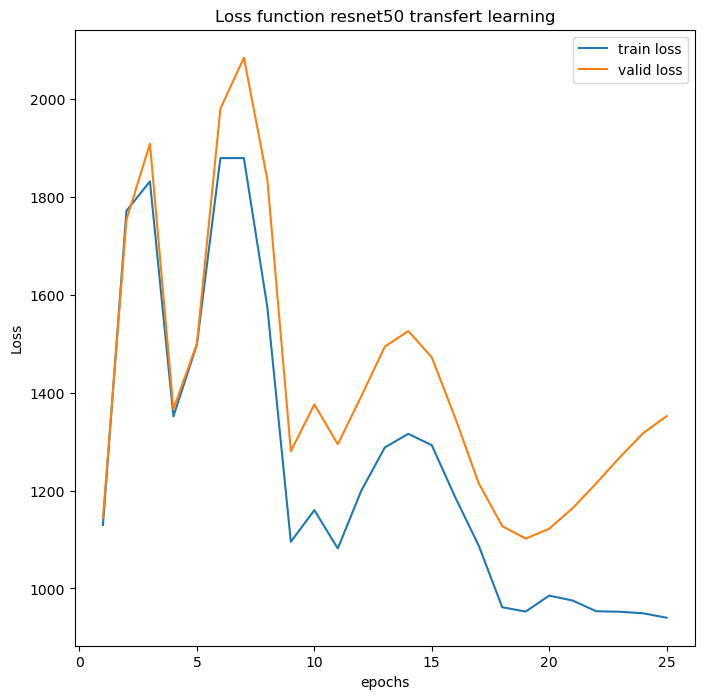

In [12]:
plt.figure(figsize=(8,8))

plt.plot(range(1,epochs + 1), train_class.loss_train, label="train loss" )
plt.plot(range(1, epochs +1), train_class.loss_valid, label="valid loss")
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.title("Loss function resnet50 transfert learning")
plt.legend()

plt.savefig("Loss function resnet50 transfert learning.png")
plt.show()